In [1]:
import pandas as pd
import matplotlib as plt

#Step 1: Collecting or acquiring the data
#Adding path
data= "D:\Desktop\Important Docs\MyCertificates\Prodigy Infotech\Task2\DataScientists.csv"

#Reading Data from the path with the help of read_csv() function of pandas library
df= pd.read_csv(data)

In [10]:
#Step 2:Knowing Your Data
df.info() #
print("------------------------------------------------------")
print(df.shape)
print("------------------")
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        555 non-null    object 
 1   title                       533 non-null    object 
 2   location                    432 non-null    object 
 3   salary                      464 non-null    object 
 4   company_industry            463 non-null    object 
 5   education                   476 non-null    object 
 6   prior_experience            343 non-null    object 
 7   bonus                       282 non-null    object 
 8   stocks                      396 non-null    object 
 9   total_comp                  494 non-null    object 
 10  additional_benefits         555 non-null    bool   
 11  tenure_length_period        459 non-null    float64
 12  tenure_length_period_units  555 non-null    object 
 13  survey_year                 555 non

In [3]:
print(df.head(2))
print("----------------------------------------------------------------------------")
print("----------------------------------------------------------------------------")
print(df.tail(2))
print("----------------------------------------------------------------------------")
print("CONCLUSION")
print("----------------------------------------------------------------------------")
print(" 1.There are mostly object data type \n 2.There are 14 columns and 555 Rows")

         date            title          location   salary  \
0  2020-12-28   Data Scientist  Houston, TX, USA  140,000   
1  2020-12-28  Program Analyst               NaN    86000   

             company_industry                      education  \
0                 Oil and Gas  Masters in Applied Statistics   
1  Federal Gov't (non defense                           M.Ed   

                                    prior_experience bonus  \
0                       2yrs of actuarial experience   NaN   
1  8 years at same agency in administrative posit...  Nope   

                                              stocks  \
0  15-30% bonus  (no bonus this year of course du...   
1                                                NaN   

                                          total_comp  additional_benefits  \
0  140,000I'm about to accept a new job that will...                False   
1                                                NaN                False   

   tenure_length_period tenure_leng

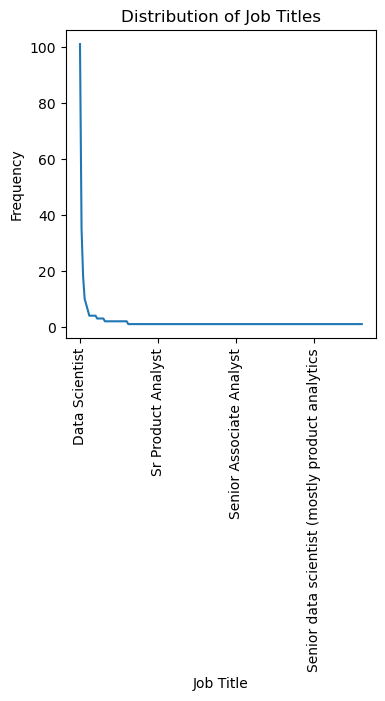

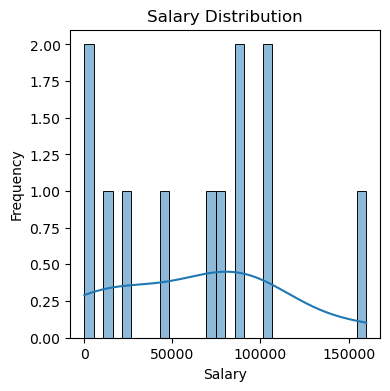

In [6]:
#Step 5: Visulization of the overall Data in various parts

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = dfnew

# Convert columns to appropriate data types
data['salary'] = pd.to_numeric(data['salary'], errors='coerce')
data['total_comp'] = pd.to_numeric(data['total_comp'], errors='coerce')
data['tenure_length_period'] = pd.to_numeric(data['tenure_length_period'], errors='coerce')

# 1. Distribution of Job Titles
plt.figure(figsize=(4, 4))
data['title'].value_counts().plot()
plt.title('Distribution of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# 2. Salary Distribution
plt.figure(figsize=(4, 4))
sns.histplot(data['salary'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [4]:
#Step 3:Cleaning Data & Preprocessing

#Step 3.1 : Removing all null values rows according to each important column
#Removing the Null Values rows in Salary Coulmn
df1=df.dropna(subset=['salary'])
print(df1.shape)

#From the above filter now filter oute the rows tenure_length_period_units are unknown 
df2 = df1[df1['tenure_length_period_units'] != 'unknown']
print("df2:",df2.shape)


df3= df2.dropna(subset=['title'])
# Since there were no uniquely NA data 
df3=df2.dropna(subset=['company_industry'])
print("df3:", df3.shape)


df4=df3.dropna(subset=["education"])
print("df4:", df4.shape)

#Step 3.2 Extract & save rows according to specific less important columns 
Prior_Experience=df4.dropna(subset=["prior_experience"])
Bonus=df4.dropna(subset=["bonus"])


#Columns for which we Did not find the clear definition of stocks droppin
df4= df4.drop(['stocks'], axis=1) 
df4= df4.drop(['additional_benefits'], axis=1)



#Making data consistent by bringing data to common Unit
unit=df4["tenure_length_period_units"]
time=df4["tenure_length_period"]
specific_value = 'years'
column_to_check = 'tenure_length_period_units'
column_to_multiply = 'tenure_length_period'

# Function to apply the transformation
def multiply_column(row, match_value, column_to_check, column_to_multiply):
    if row[column_to_check] == match_value:
        row[column_to_multiply] *= 12
    return row

# Apply the function to each row
dfnew = df4.apply(lambda row: multiply_column(row, specific_value, column_to_check, column_to_multiply), axis=1)
dfnew['tenure_length_period_units']= df4['tenure_length_period_units'].replace('years', 'months')
print(dfnew)



(464, 14)
df2: (413, 14)
df3: (410, 14)
df4: (394, 14)
           date                                              title  \
0    2020-12-28                                     Data Scientist   
1    2020-12-28                                    Program Analyst   
2    2020-12-28                                     Data Scientist   
3    2020-12-28                       Senior Software Engineer (ML   
4    2020-12-28                            Data Science Consultant   
..          ...                                                ...   
549  2023-12-29  Manager, Risk Strategy &amp; Policy (Data Science   
550  2023-12-29                              senior data scientist   
551  2023-12-29                                Lead Data Scientist   
553  2023-12-29                                  Sr Data Scientist   
554  2023-12-29                                   Data Scientist I   

                location    salary            company_industry  \
0       Houston, TX, USA   140,000    

In [5]:
#Step 4: Analyzing the preprocessed data & Retreiving Information from Data


print(dfnew.describe())

       tenure_length_period  survey_year
count            378.000000   394.000000
mean              22.845503  2020.979695
std               21.132756     1.334450
min                0.000000  2019.000000
25%               12.000000  2020.000000
50%               18.000000  2021.000000
75%               30.000000  2022.000000
max              120.000000  2023.000000


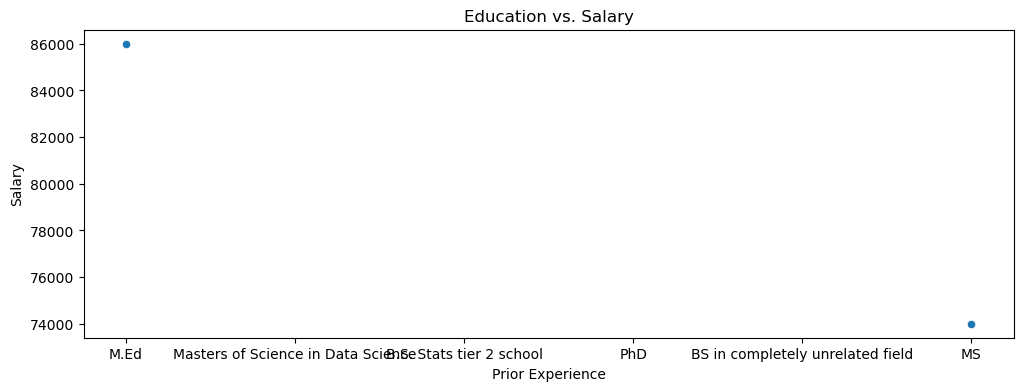

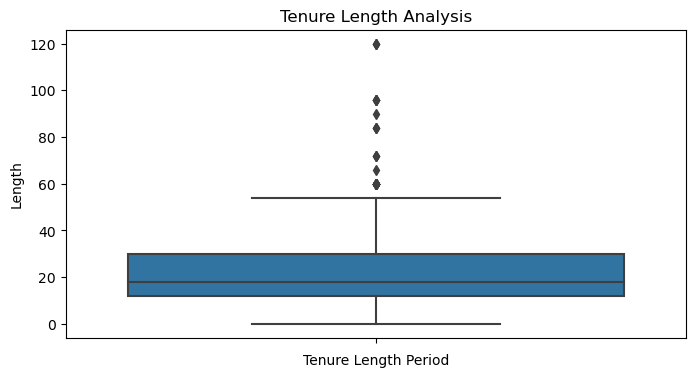

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = dfnew
sample_data=dfnew.head(10)


threshold = 0.03

# 4. Experience vs. Salary
plt.figure(figsize=(12, 4))
sns.scatterplot(x='education', y='salary', data=sample_data)
plt.title('Education vs. Salary')
plt.xlabel('Prior Experience')
plt.ylabel('Salary')
plt.show()

# 8. Tenure Length Analysis
plt.figure(figsize=(8, 4))
sns.boxplot(y='tenure_length_period', data=data)
plt.title('Tenure Length Analysis')
plt.xlabel('Tenure Length Period')
plt.ylabel('Length')
plt.show()

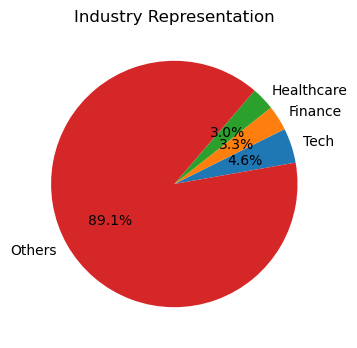

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = dfnew

# Determine a threshold for major categories (e.g., categories with at least 5% representation)
threshold = 0.03

# Calculate the value counts and the total number of entries
value_counts = data['company_industry'].value_counts()
total_count = value_counts.sum()

# Separate major and minor categories
major_categories = value_counts[value_counts / total_count >= threshold]
minor_categories = value_counts[value_counts / total_count < threshold]

# Create a new Series for the pie chart data
pie_data = major_categories.copy()
pie_data['Others'] = minor_categories.sum()

# Plot the pie chart
plt.figure(figsize=(4, 4))
pie_data.plot(kind='pie', autopct='%1.1f%%', startangle=10)

plt.title('Industry Representation')
plt.ylabel('')
plt.show()

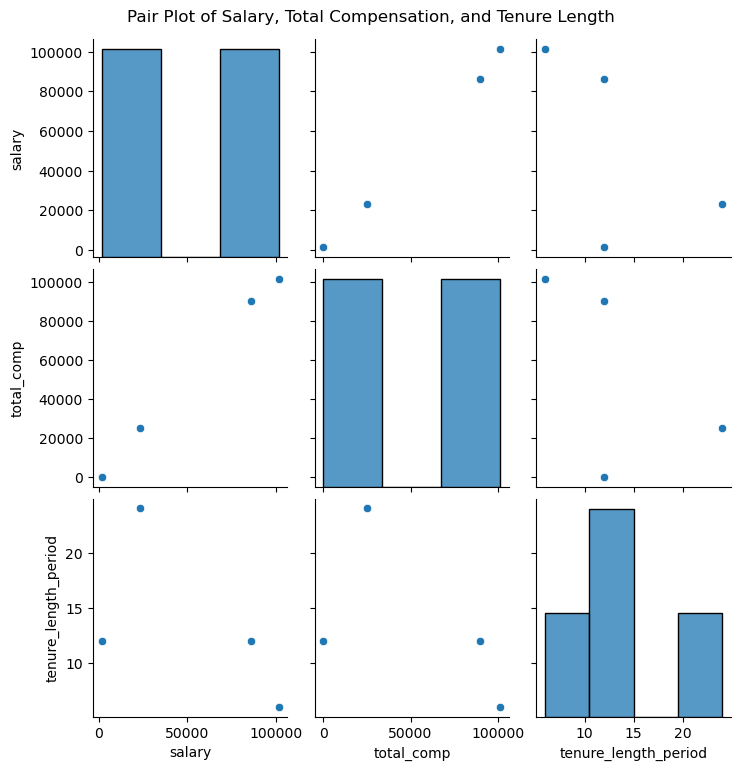

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = dfnew

# Convert columns to appropriate data types
data['salary'] = pd.to_numeric(data['salary'], errors='coerce')
data['total_comp'] = pd.to_numeric(data['total_comp'], errors='coerce')
data['tenure_length_period'] = pd.to_numeric(data['tenure_length_period'], errors='coerce')

# Select the columns of interest
selected_columns = ['salary', 'total_comp', 'tenure_length_period']

# Drop rows with missing values in the selected columns
filtered_data = data[selected_columns].dropna()

# Create the pair plot
sns.pairplot(filtered_data)
plt.suptitle('Pair Plot of Salary, Total Compensation, and Tenure Length', y=1.02)
plt.show()